Link for data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

# Linear regression from scratch 


In [1717]:
import pandas as pd
df = pd.read_csv("Car details v3.csv")

About the data : 

- year : year when car was bought

- selling_price : price at which the car is being sold

- km_driven 

- fuel: fuel type ( petrol/diesel/CNG,elctric,,lpg,etc)

- seller_type : if seller is a dealer or individual

- transmission : automatic or manual

- owner : num of prev owners



In [1718]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [1719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1720]:
df.isna().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [1721]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:

df['max_power'] = df['max_power'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x)


In [ ]:

df['mileage'] = df['mileage'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x)


In [ ]:

df['engine'] = df['engine'].apply(lambda x: str(x).split()[0] if pd.notna(x) else x)


In [1725]:
df.drop(columns=['name','torque'],inplace=True)

In [1726]:
df['age']=2025-df['year']

In [1727]:
df.drop(columns=['year'],inplace=True)

In [1728]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0,12
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0,18
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0,16
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0,12


In [1729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
 10  age            8128 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [1730]:
df['mileage']=df['mileage'].astype(float)
df['engine']=df['engine'].astype(float)


In [ ]:



df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


df = df.dropna(subset=['max_power'])


df.reset_index(drop=True, inplace=True)




In [1732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7912 non-null   int64  
 1   km_driven      7912 non-null   int64  
 2   fuel           7912 non-null   object 
 3   seller_type    7912 non-null   object 
 4   transmission   7912 non-null   object 
 5   owner          7912 non-null   object 
 6   mileage        7906 non-null   float64
 7   engine         7906 non-null   float64
 8   max_power      7912 non-null   float64
 9   seats          7906 non-null   float64
 10  age            7912 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 680.1+ KB


In [1733]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [1734]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)


In [1735]:
df

,selling_price,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,11,False,True,False,...,False,True,False,False,True,True,False,False,False,False
1,370000,120000,21.14,1498.0,103.52,5.0,11,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,158000,140000,17.70,1497.0,78.00,5.0,19,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,225000,127000,23.00,1396.0,90.00,5.0,15,False,True,False,...,False,True,False,False,True,True,False,False,False,False
4,130000,120000,16.10,1298.0,88.20,5.0,18,False,False,False,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,320000,110000,18.50,1197.0,82.85,5.0,12,False,False,False,...,False,True,False,False,True,True,False,False,False,False
7908,135000,119000,16.80,1493.0,110.00,5.0,18,False,True,False,...,False,True,False,False,True,False,True,False,False,False
7909,382000,120000,19.30,1248.0,73.90,5.0,16,False,True,False,...,False,True,False,False,True,True,False,False,False,False
7910,290000,25000,23.57,1396.0,70.00,5.0,12,False,True,False,...,False,True,False,False,True,True,False,False,False,False


In [1736]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [1737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7912 non-null   int64  
 1   km_driven                     7912 non-null   int64  
 2   mileage                       7906 non-null   float64
 3   engine                        7906 non-null   float64
 4   max_power                     7912 non-null   float64
 5   seats                         7906 non-null   float64
 6   age                           7912 non-null   int64  
 7   fuel_CNG                      7912 non-null   int64  
 8   fuel_Diesel                   7912 non-null   int64  
 9   fuel_LPG                      7912 non-null   int64  
 10  fuel_Petrol                   7912 non-null   int64  
 11  seller_type_Dealer            7912 non-null   int64  
 12  seller_type_Individual        7912 non-null   int64  
 13  sel

## Visualizations

In [1738]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7912 non-null   int64  
 1   km_driven                     7912 non-null   int64  
 2   mileage                       7906 non-null   float64
 3   engine                        7906 non-null   float64
 4   max_power                     7912 non-null   float64
 5   seats                         7906 non-null   float64
 6   age                           7912 non-null   int64  
 7   fuel_CNG                      7912 non-null   int64  
 8   fuel_Diesel                   7912 non-null   int64  
 9   fuel_LPG                      7912 non-null   int64  
 10  fuel_Petrol                   7912 non-null   int64  
 11  seller_type_Dealer            7912 non-null   int64  
 12  seller_type_Individual        7912 non-null   int64  
 13  sel

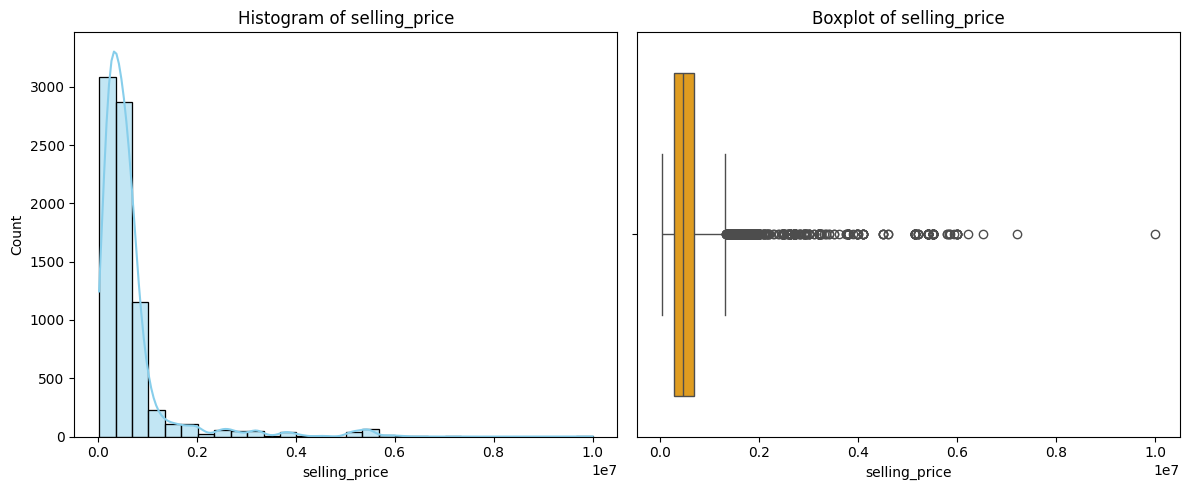

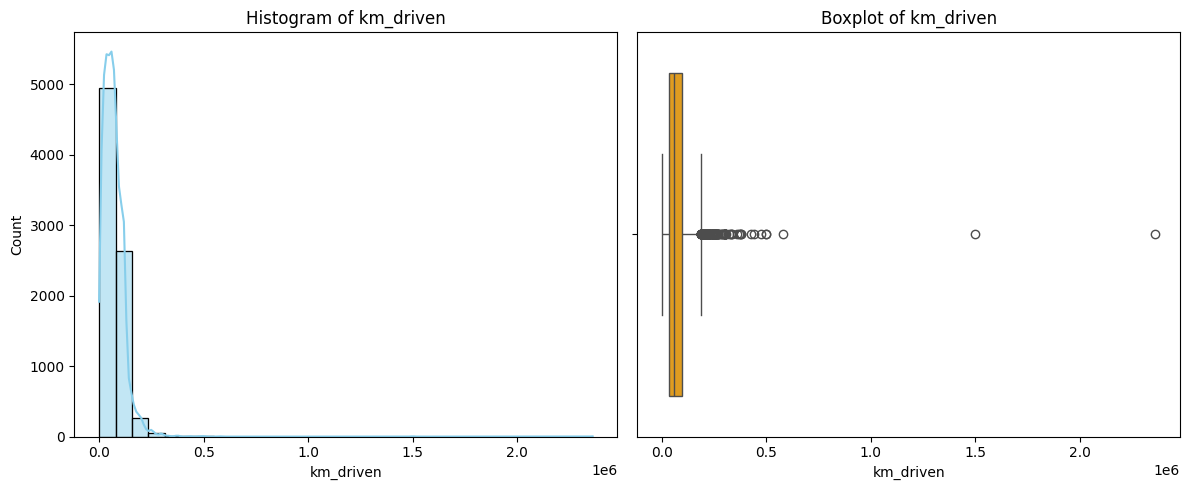

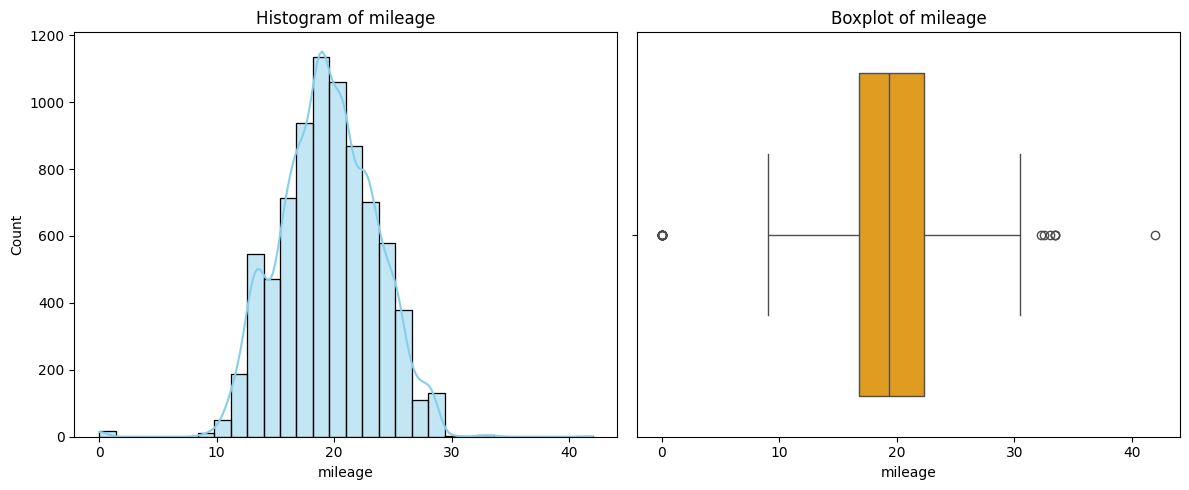

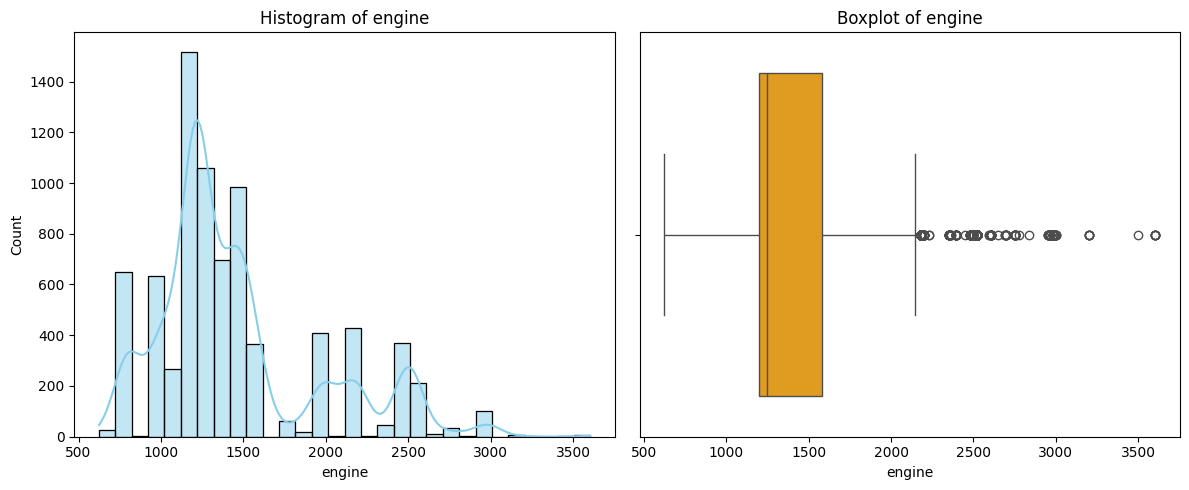

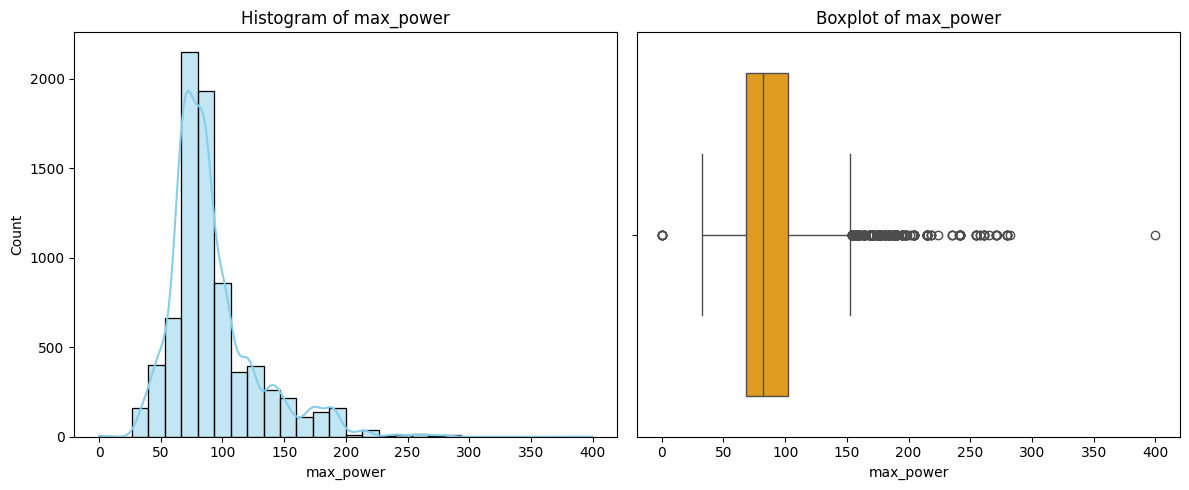

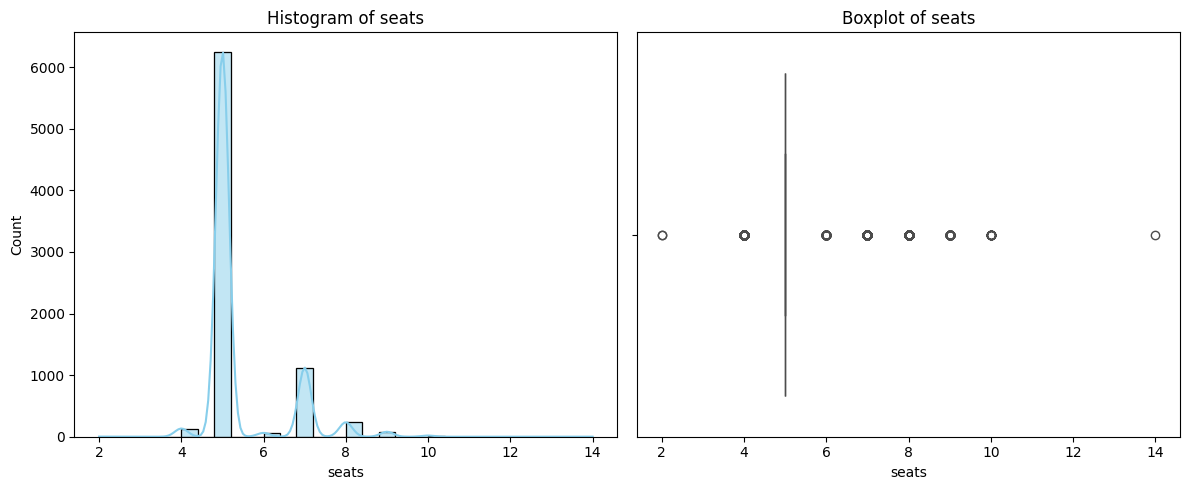

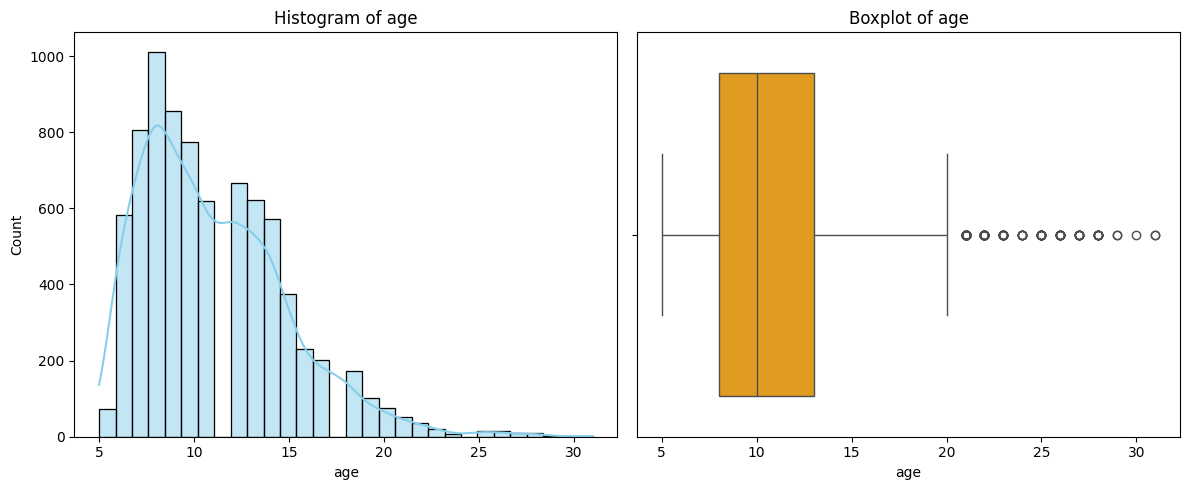

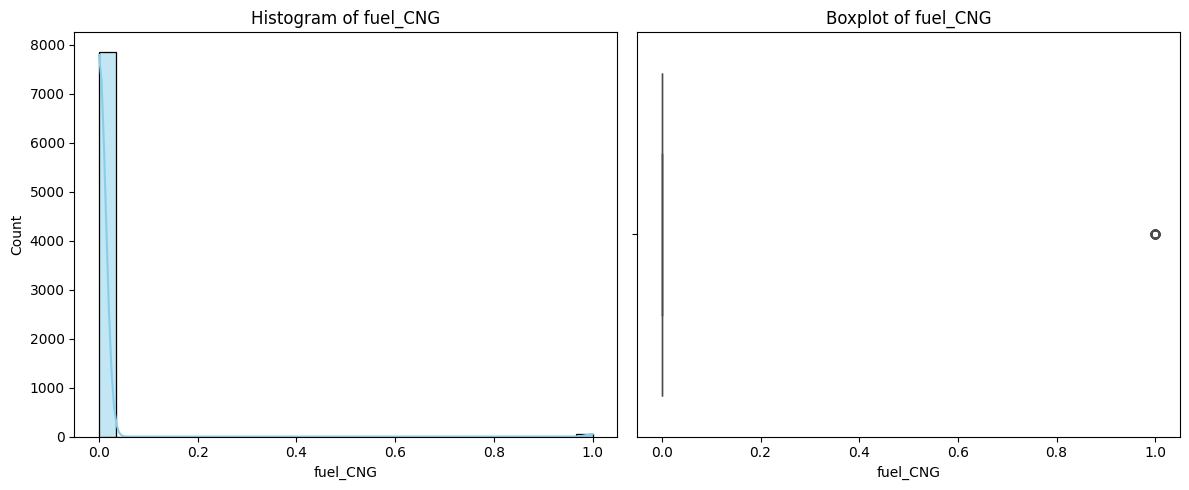

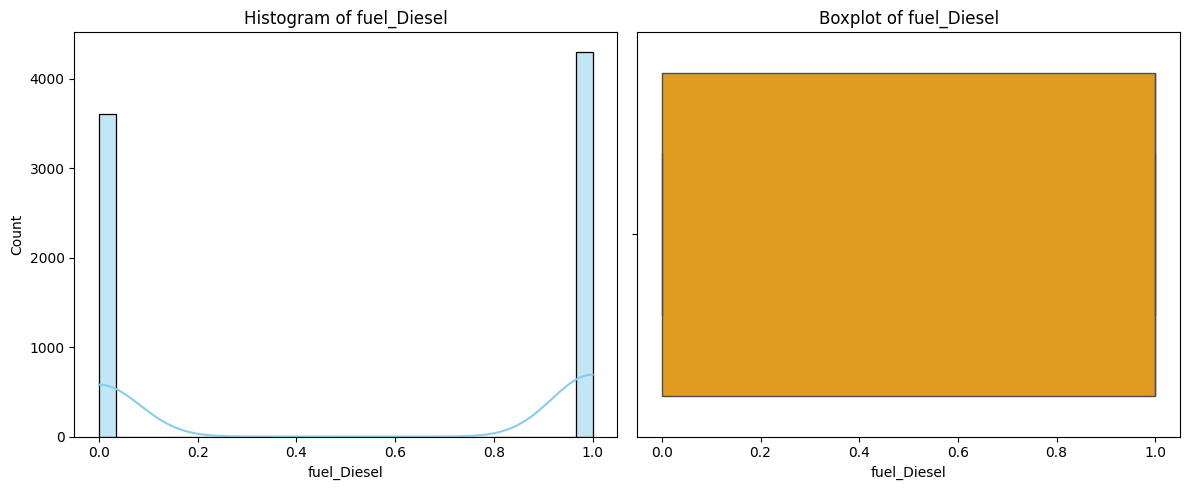

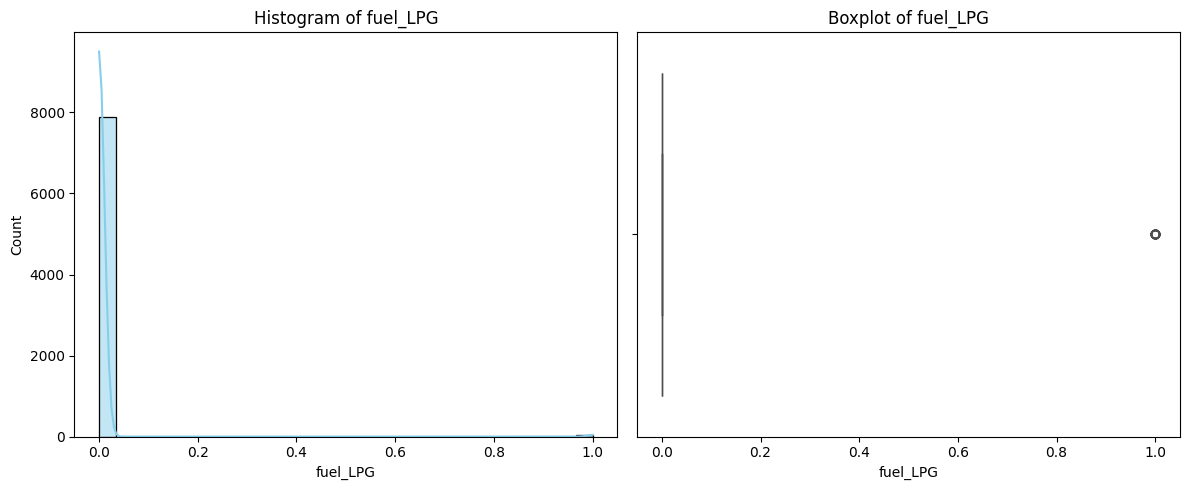

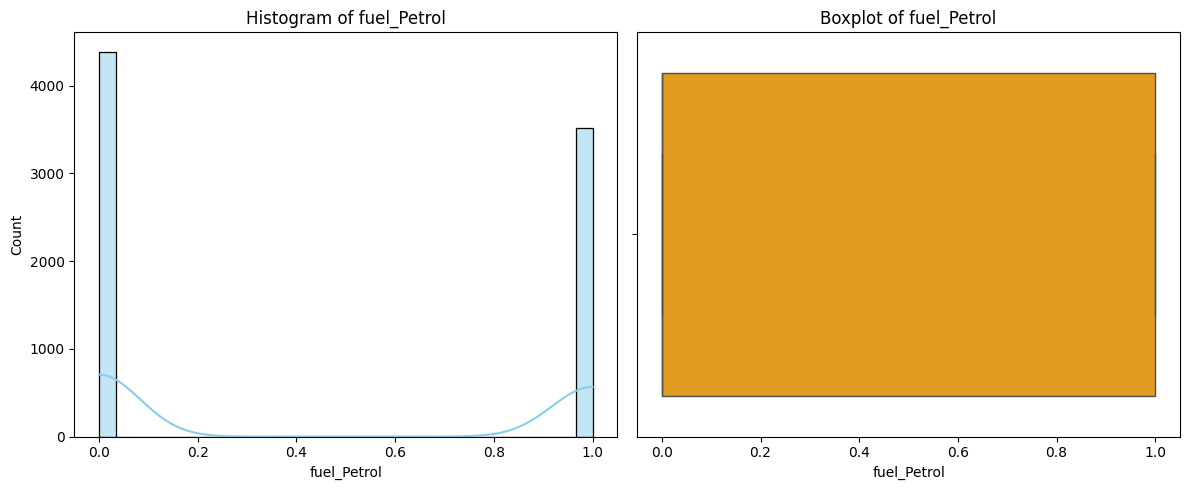

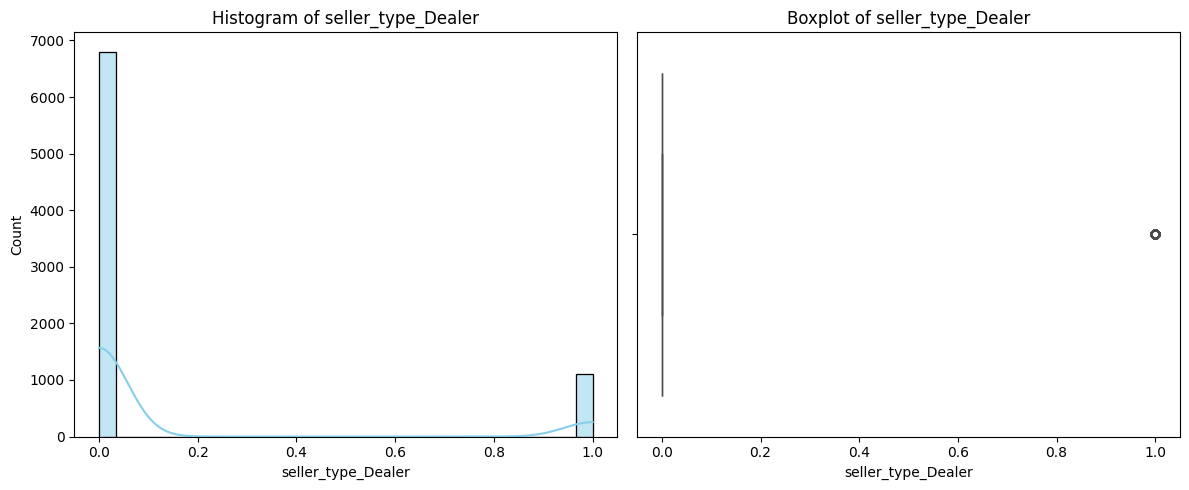

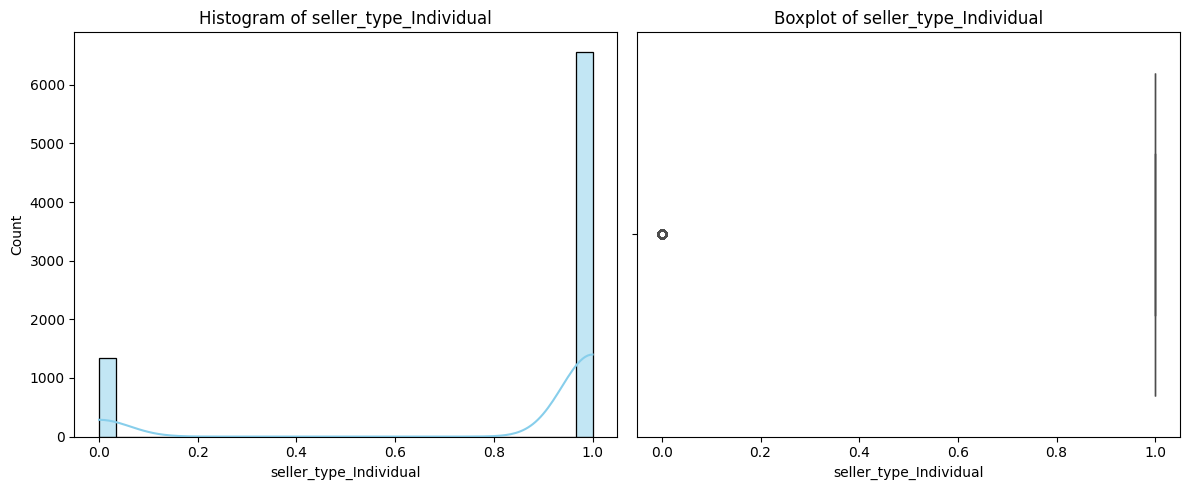

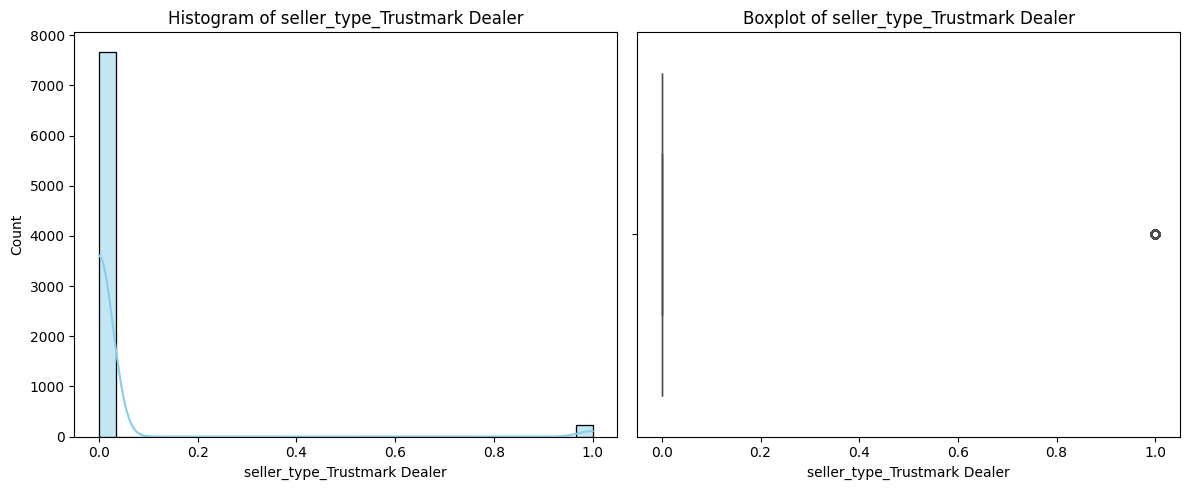

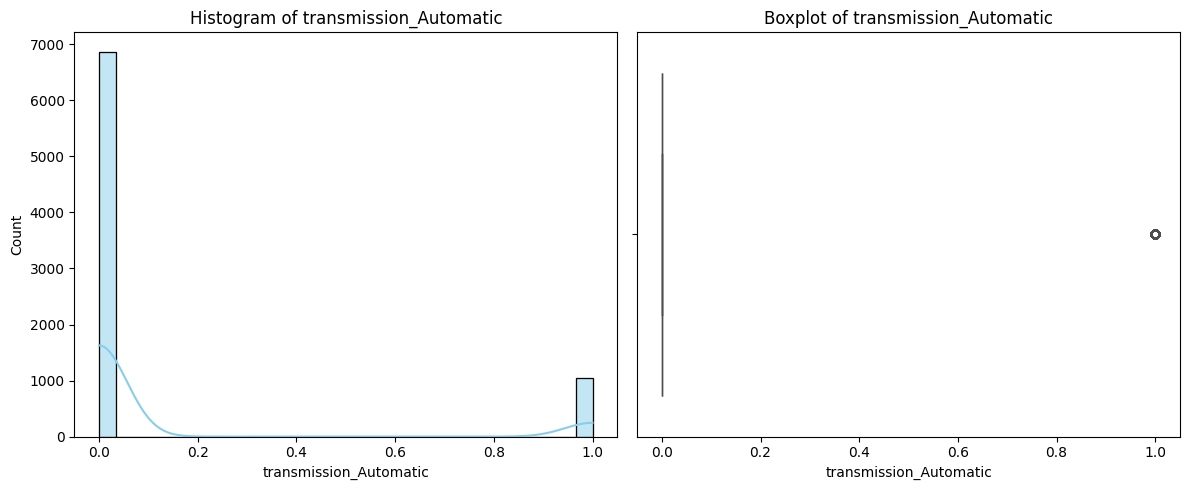

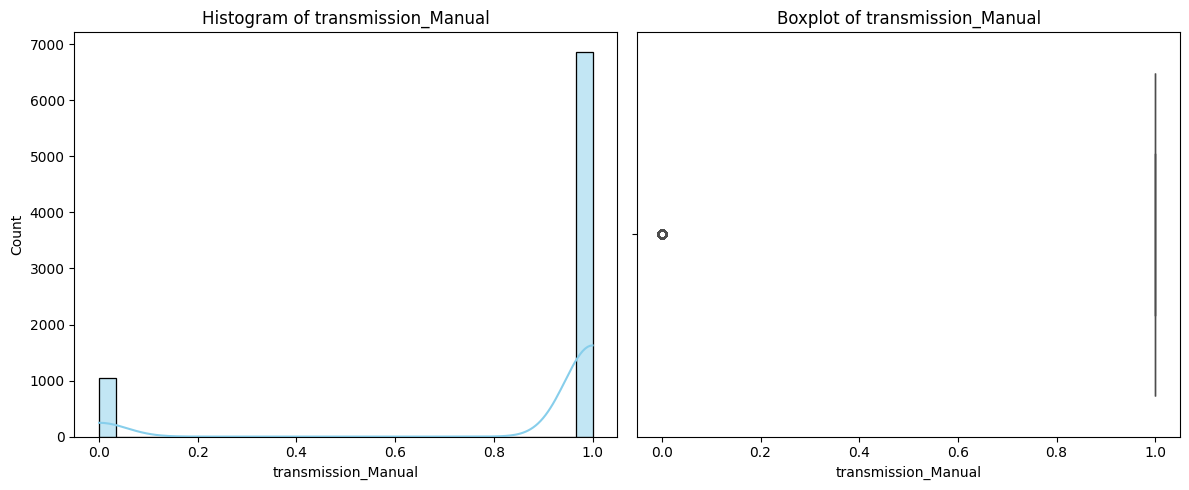

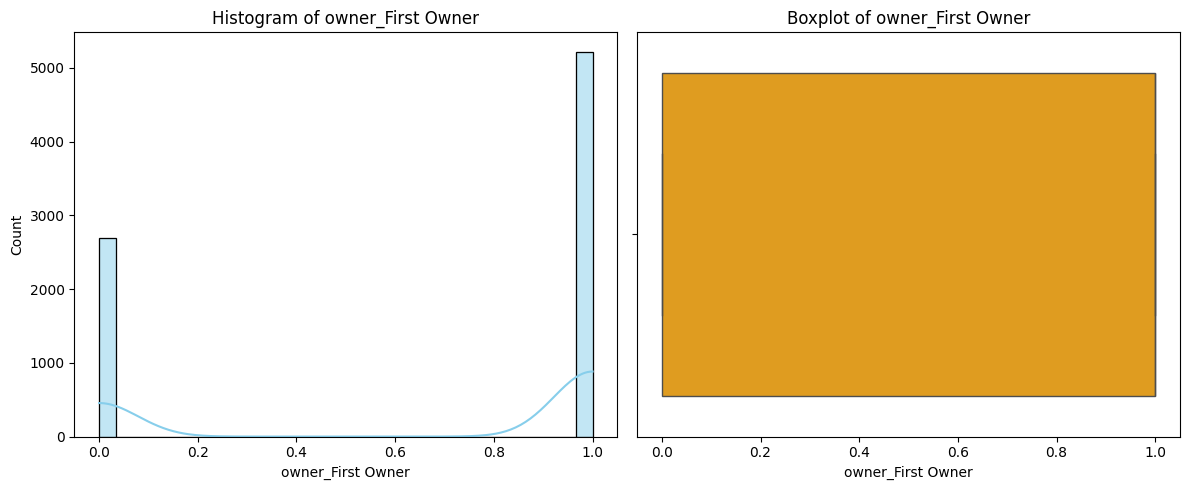

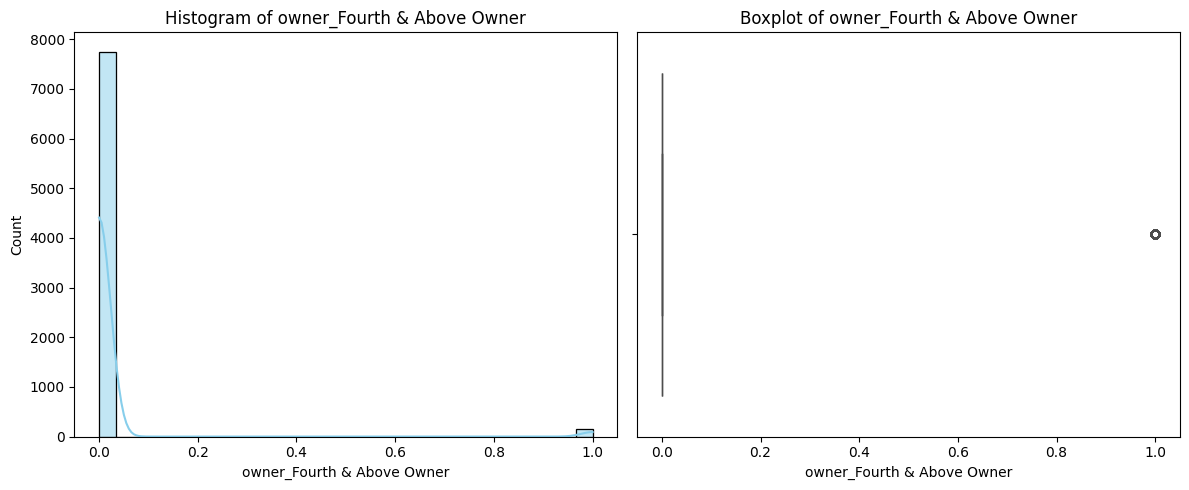

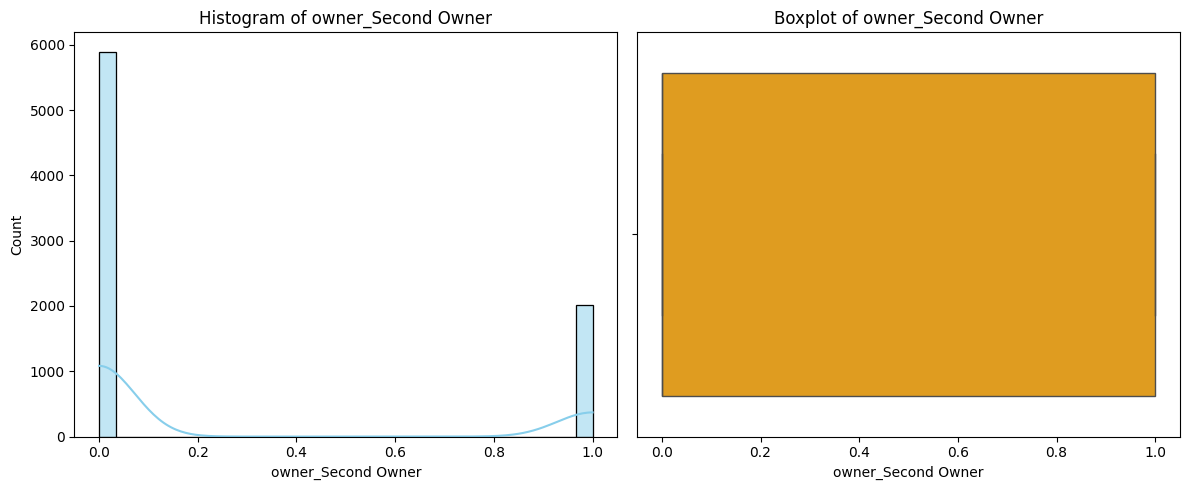

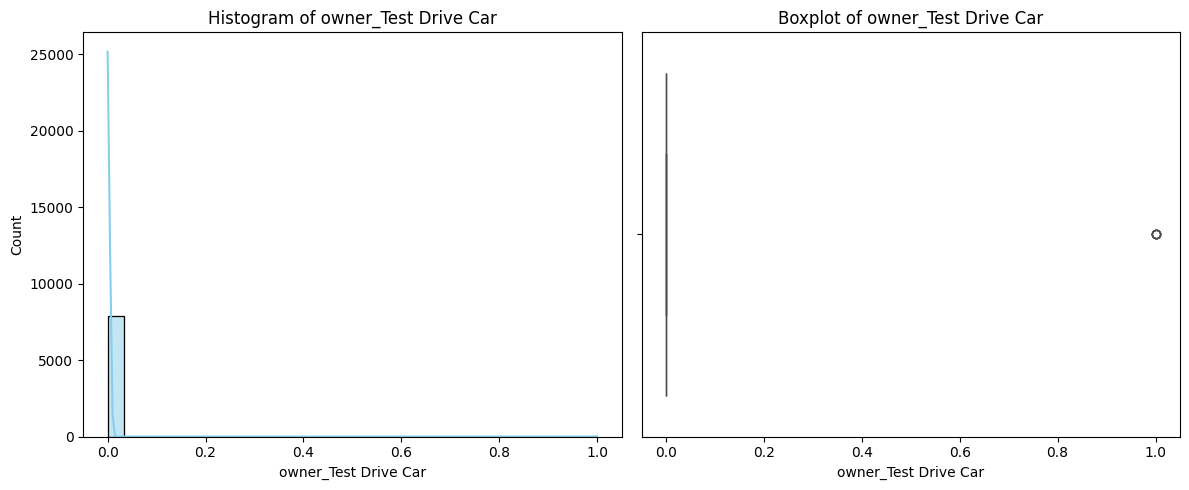

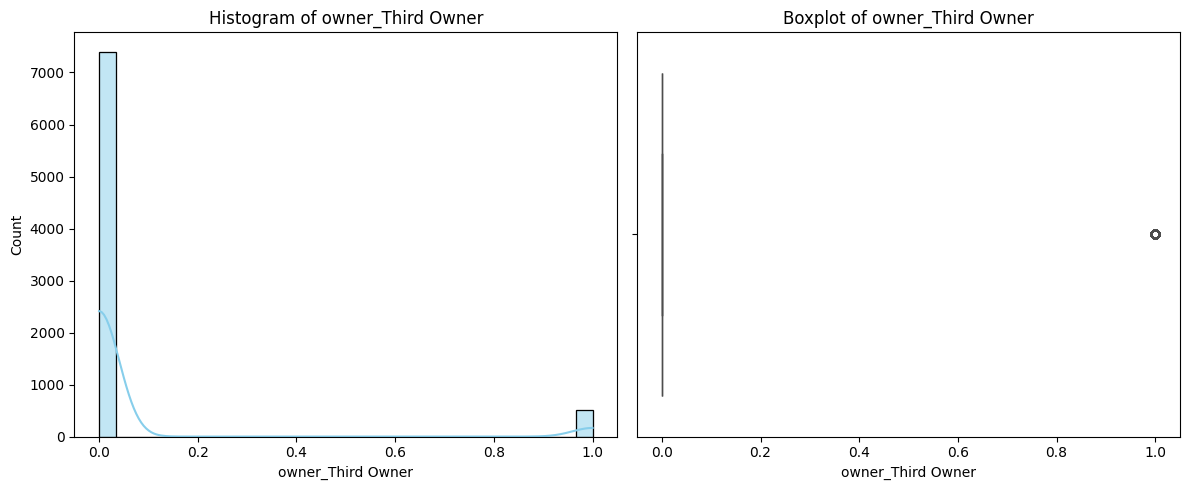

In [1740]:
# Automatically handle only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [1741]:
df

,selling_price,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,11,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,11,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,19,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,15,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,18,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,320000,110000,18.50,1197.0,82.85,5.0,12,0,0,0,...,0,1,0,0,1,1,0,0,0,0
7908,135000,119000,16.80,1493.0,110.00,5.0,18,0,1,0,...,0,1,0,0,1,0,1,0,0,0
7909,382000,120000,19.30,1248.0,73.90,5.0,16,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7910,290000,25000,23.57,1396.0,70.00,5.0,12,0,1,0,...,0,1,0,0,1,1,0,0,0,0


<Axes: >

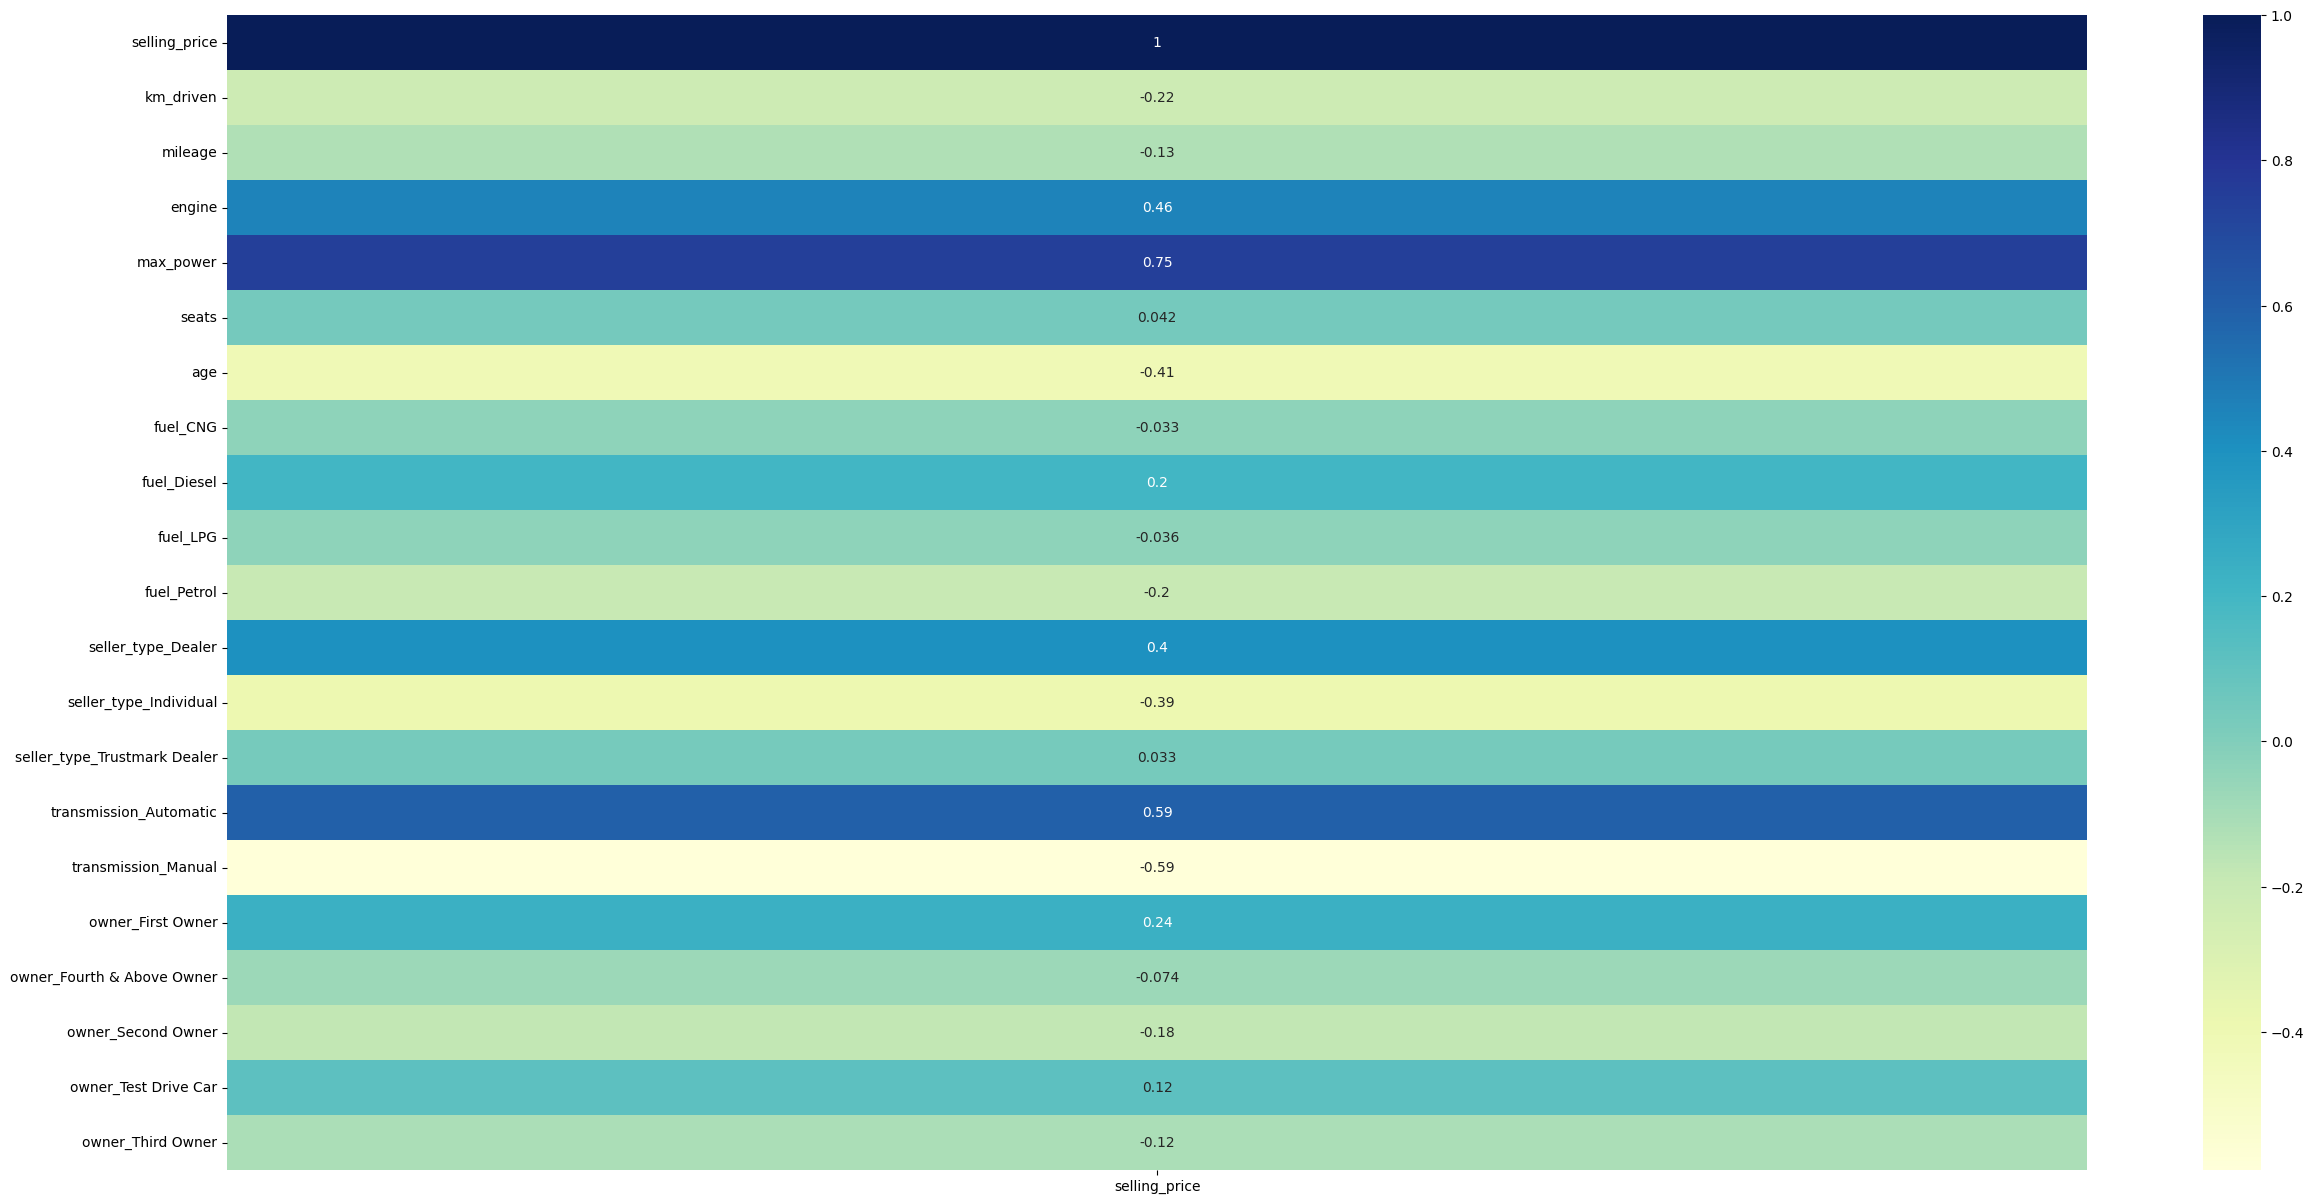

In [1742]:
#correlation heatmap of all the columns with resale price
correlation=df.corr()
selling_price_correlation = correlation[['selling_price']]

plt.figure(figsize=(30,15))
sns.heatmap(selling_price_correlation,annot=True,cmap="YlGnBu")

In [1743]:
df = df.dropna(subset=['mileage', 'engine'])


In [1744]:
X = df.drop(columns= ['selling_price','seats','fuel_CNG','owner_Fourth & Above Owner','seller_type_Trustmark Dealer','owner_Test Drive Car','owner_Third Owner'])
y = df['selling_price']

In [1745]:
import numpy as np 

In [1746]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 7911
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km_driven               7906 non-null   int64  
 1   mileage                 7906 non-null   float64
 2   engine                  7906 non-null   float64
 3   max_power               7906 non-null   float64
 4   age                     7906 non-null   int64  
 5   fuel_Diesel             7906 non-null   int64  
 6   fuel_LPG                7906 non-null   int64  
 7   fuel_Petrol             7906 non-null   int64  
 8   seller_type_Dealer      7906 non-null   int64  
 9   seller_type_Individual  7906 non-null   int64  
 10  transmission_Automatic  7906 non-null   int64  
 11  transmission_Manual     7906 non-null   int64  
 12  owner_First Owner       7906 non-null   int64  
 13  owner_Second Owner      7906 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 926.5 

In [1747]:
X

,km_driven,mileage,engine,max_power,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner
0,145500,23.40,1248.0,74.00,11,1,0,0,0,1,0,1,1,0
1,120000,21.14,1498.0,103.52,11,1,0,0,0,1,0,1,0,1
2,140000,17.70,1497.0,78.00,19,0,0,1,0,1,0,1,0,0
3,127000,23.00,1396.0,90.00,15,1,0,0,0,1,0,1,1,0
4,120000,16.10,1298.0,88.20,18,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,110000,18.50,1197.0,82.85,12,0,0,1,0,1,0,1,1,0
7908,119000,16.80,1493.0,110.00,18,1,0,0,0,1,0,1,0,0
7909,120000,19.30,1248.0,73.90,16,1,0,0,0,1,0,1,1,0
7910,25000,23.57,1396.0,70.00,12,1,0,0,0,1,0,1,1,0


In [1748]:
X = (X - X.min()) / (X.max() - X.min())


In [1750]:
X.isna().sum()

km_driven                 0
mileage                   0
engine                    0
max_power                 0
age                       0
fuel_Diesel               0
fuel_LPG                  0
fuel_Petrol               0
seller_type_Dealer        0
seller_type_Individual    0
transmission_Automatic    0
transmission_Manual       0
owner_First Owner         0
owner_Second Owner        0
dtype: int64

In [1751]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
7907    320000
7908    135000
7909    382000
7910    290000
7911    290000
Name: selling_price, Length: 7906, dtype: int64

In [1752]:
v = np.random.randint(1, 7906, size=3000)

In [1753]:
# Create full set of numbers from 1 to 4339
full_set = np.arange(1, 7906)

# Use np.setdiff1d to get elements in full_set but not in v
p = np.setdiff1d(full_set, v)

In [1754]:
X_train = X.iloc[p]
y_train = y.iloc[p]

In [1755]:
X_test = X.iloc[v]
y_test = y.iloc[v]

In [1756]:
class LinearRegression:

    def __init__(self, lr = 0.5, n_iters=100000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #initializing the weights with  all zeros
        self.weights = np.zeros(n_features)
        #intialising bias with 0
        self.bias = 0

        for _ in range(self.n_iters):
            #print("-------------------------------------------------------------------------------------------------")
            #print(X)
           # print("-------------------------------------------------------------------------------------------------")
            y_pred = np.dot(X, self.weights) + self.bias
            #print("this is y pred........................")
            #print(y_pred)
            

# the derivative of the mean of least squares with respect to weights(i.e slope) and biases(i.e intercept)
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            #print("------------------------------dw---------------dw----------------------------------------------------")
            #(np.dot(X.T, (y_pred-y)))
            #print("-------------------------------db-----------------db-------------------------------------------------")
            db = (1/n_samples) * np.sum(y_pred-y)
            #(db)
            #("-------------------------------------------------------------------------------------------------")
#updating the w and b by using learning rate
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [1757]:
reg=LinearRegression()
reg.fit(X_train,y_train)


In [1758]:
predictions = reg.predict(X_test)

In [1759]:
predictions

array([ 941727.38652774,  999104.39873225, 1541798.78860438, ...,
        197222.3557425 ,  306915.39352875, 1005921.74119474])

In [1760]:

y_pred = predictions

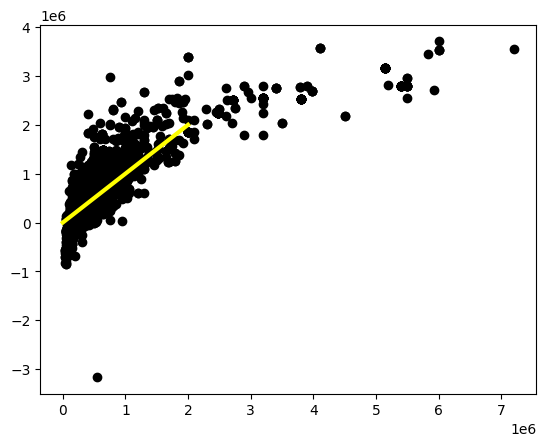

In [1761]:
plt.scatter(y_test, y_pred, color = 'black', edgecolors='black')
Ideal_lineX = np.linspace(0, 2000000, 150000)
plt.plot(Ideal_lineX, Ideal_lineX, color='yellow', linewidth = 3)

In [1767]:
y_pred.size

3000

In [1768]:
#r2
def r2_score(y_true, y_pred):

    y_mean = np.mean(y_true)

    TSS = np.sum((y_true - y_mean) ** 2)
    SSR = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (SSR / TSS)

    return r2
#MSE:mean squared error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
#r2
def rss(y_true, y_pred):
    n = y_true.size
    return n*mse(y_true,y_pred)



In [1769]:
r2_score(y_test, predictions)

np.float64(0.6812852634026484)

In [1770]:
mse(y_test,predictions)

np.float64(225879466457.4279)

In [1771]:
rss(y_test,predictions)

np.float64(677638399372283.6)